Figure S4 in Mahdavi et al. (2021) Environmental Pollution (in the Supplemental Information (SI))

This figure illustrates distributional data of DC1700 particle number concentration week-by-week in the studied home.

Plot type: Box plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
exec(open(r'C:\PhD Research\Generic Codes\notion_corrections.py').read())

In [2]:
#### Preprocessing

cor_f = 6.7223 / 17.9024

df = pd.read_excel(backslash_correct(r'C:\PhD Research\Airborne\Processed\\') + 'dc_1700.xlsx')
df.rename(columns = {'Date/Time': 'Time'}, inplace = True)

rt = pd.read_excel(backslash_correct(r'C:\PhD Research\Airborne\Processed\runtime_master.xlsx'))
rt.drop(['visit'], axis = 1, inplace = True)

df = df.merge(rt, on = 'Time', how = 'inner')
df.columns
for col in df.columns:
    df.rename(columns = {col : col.strip()}, inplace = True)
    
df['Concentration'] = (df['Small'] - df['Large']) * 35.3147 * cor_f
df.drop(['Pressure', 'Small', 'Large'], axis = 1, inplace = True)

df['Mode'] = np.where(df['Mode'] == 'Off', 'Off', 'On')

df_new = df.copy()
df_new['visit'] = 7

df = df.append(df_new)

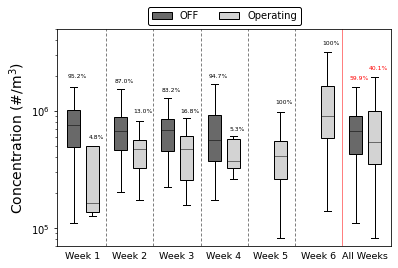

In [3]:
### Figure

fig, ax = plt.subplots()

medianprops = dict(linestyle = '-', linewidth = 0.5, color = 'black')
pos_dict = {1: [1,2],
            2: [3.5,4.5],
            3: [6,7],
            4: [8.5,9.5],
            5: [11,12],
            6: [13.5,14.5],
            7: [16,17]}

for v in range(1,8):
    vars()['box%s' %v] = plt.boxplot([df[(df['visit'] == v) & (df['Mode'] == 'Off')]['Concentration'], 
                                      df[(df['visit'] == v) & (df['Mode'] == 'On')]['Concentration']],
                                     positions = pos_dict[v], widths = 0.7, showfliers = False, patch_artist = True, medianprops = medianprops)

colors = ['dimgrey', 'lightgray']

for bplot in (box1, box2, box3, box4, box5, box6, box7):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.axvline(x = 2.75, c = 'k',  ls = (0, (6, 4)), lw = 0.5)
plt.axvline(x = 5.25, c = 'k', ls = (0, (6, 4)), lw = 0.5)
plt.axvline(x = 7.75, c = 'k', ls = (0, (6, 4)), lw = 0.5)
plt.axvline(x = 10.25, c = 'k', ls = (0, (6, 4)), lw = 0.5)
plt.axvline(x = 12.75, c = 'k', ls = (0, (6, 4)), lw = 0.5)
plt.axvline(x = 15.25, c = 'r', ls = '-', lw = 0.5)

plt.xticks([])
plt.xlim(0.1, 17.9)

plt.yscale('log')
plt.ylabel('Concentration (#/m$^{3}$)', fontsize = 14)
plt.ylim(70000, 5000000)
plt.yticks(np.logspace(5,6,2))

plt.text(1.5, 57500, 'Week 1', fontsize = 9.5, ha = 'center', va = 'center')
plt.text(4, 57500, 'Week 2', fontsize = 9.5, ha = 'center', va = 'center')
plt.text(6.5, 57500, 'Week 3', fontsize = 9.5, ha = 'center', va = 'center')
plt.text(9, 57500, 'Week 4', fontsize = 9.5, ha = 'center', va = 'center')
plt.text(11.5, 57500, 'Week 5', fontsize = 9.5, ha = 'center', va = 'center')
plt.text(14, 57500, 'Week 6', fontsize = 9.5, ha = 'center', va = 'center')
plt.text(16.5, 57500, 'All Weeks', fontsize = 9.5, ha = 'center', va = 'center')

ax.legend(box1['boxes'], ['OFF', 'Operating'], 
          ncol = 2, loc='upper center', bbox_to_anchor=(0.501, 1.125),  frameon = True, edgecolor = 'black', framealpha=1)

plt.text(1.2, 2000000, '95.2%', fontsize = 6, ha = 'center', va = 'center')
plt.text(2.2, 600000, '4.8%', fontsize = 6, ha = 'center', va = 'center')

plt.text(3.7, 1800000, '87.0%', fontsize = 6, ha = 'center', va = 'center')
plt.text(4.7, 1000000, '13.0%', fontsize = 6, ha = 'center', va = 'center')

plt.text(6.2, 1500000, '83.2%', fontsize = 6, ha = 'center', va = 'center')
plt.text(7.2, 1000000, '16.8%', fontsize = 6, ha = 'center', va = 'center')

plt.text(8.7, 2000000, '94.7%', fontsize = 6, ha = 'center', va = 'center')
plt.text(9.7, 700000, '5.3%', fontsize = 6, ha = 'center', va = 'center')

plt.text(12.2, 1200000, '100%', fontsize = 6, ha = 'center', va = 'center')

plt.text(14.7, 3800000, '100%', fontsize = 6, ha = 'center', va = 'center')

plt.text(16.2, 1900000, '59.9%', c = 'r', fontsize = 6, ha = 'center', va = 'center')
plt.text(17.2, 2300000, '40.1%', c = 'r', fontsize = 6, ha = 'center', va = 'center')

plt.savefig(r'C:/PhD Research/Airborne/Processed/plots/Figure_S4.jpg', format='jpg', dpi=1600, bbox_inches='tight')

End of Code